In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import norm

In [2]:
# Specifying the directories and paths
working_folder = "."

figures_folder = working_folder + os.path.sep + 'figures' + os.path.sep
if not os.path.isdir(figures_folder):
    os.mkdir(figures_folder)
    
data_folder = working_folder + os.path.sep + 'data' + os.path.sep # ./data/


#'./data/asos_digital_experiments_dataset.parquet'
abtest_metrics_local_path = data_folder + 'asos_digital_experiments_dataset.parquet' 
abtest_metrics_remote_path = "https://osf.io/62t7f/download" 

# Download the dataset if it does not already exist
# The body of the if-statement is a shell command
if not os.path.exists(abtest_metrics_local_path):
    !wget -O $abtest_metrics_local_path $abtest_metrics_remote_path

# Load the dataset
df = pd.read_parquet(abtest_metrics_local_path)

In [3]:
df

,experiment_id,variant_id,metric_id,time_since_start,count_c,count_t,mean_c,mean_t,variance_c,variance_t
0,036afc,2,1,1.5,188065.0,186686.0,0.107808,0.107828,0.096186,0.096201
1,036afc,2,1,2.0,245041.0,243694.0,0.131790,0.131435,0.114422,0.114160
2,036afc,2,1,2.5,277237.0,275949.0,0.143065,0.142711,0.122598,0.122345
3,036afc,2,1,3.0,315689.0,314676.0,0.161789,0.160997,0.135613,0.135077
4,036afc,2,1,3.5,338631.0,337715.0,0.172474,0.171067,0.142727,0.141803
...,...,...,...,...,...,...,...,...,...,...
24148,fdaf62,1,4,28.0,2182559.0,2180705.0,38.270483,38.858464,8478.894092,8708.839083
24149,fdaf62,1,4,29.0,2259937.0,2257899.0,38.485748,39.065107,8627.264583,8821.982824
24150,fdaf62,1,4,30.0,2341537.0,2339309.0,38.691410,39.211843,8916.435308,8848.559719
24151,fdaf62,1,4,31.0,2422152.0,2419745.0,38.705264,39.263485,8836.078773,8884.955277


### Quantos experimentos têm a metrica 1 / binaria?

In [4]:
df.loc[(df['metric_id'] == 1)]['experiment_id'].unique()

array(['036afc', '058875', '08bcc2', '0bad33', '11cf0c', '162a38',
       '1bacbe', '2203f3', '26bd38', '2c8a04', '329386', '3683df',
       '39aed1', '3b4300', '3b62b9', '3c9dfd', '3da1aa', '3fef62',
       '449c53', '4509ec', '47a23b', '48a675', '4db6c7', '51c502',
       '530a76', '54a85a', '591c2c', '5ca6d6', '64dc88', '65c732',
       '6c4737', '6f8a33', '79f97f', '7a99e4', '7cd85b', '81761c',
       '834947', '84f653', '873d9d', '87f410', '8b436e', '8e0f8a',
       '8e2cb6', '8ed19a', '9b959e', '9ed9d5', 'a1e2bf', 'a4386f',
       'a68bf4', 'adea31', 'b2da2e', 'b3280a', 'b382c6', 'b8a409',
       'bac0d3', 'c3d89d', 'c4df76', 'c56288', 'c74b98', 'cf1b96',
       'd0b910', 'd4287a', 'd53f0e', 'd54896', 'd6e1d7', 'd8f486',
       'db7752', 'df31d1', 'e4b7b9', 'e4c4a1', 'e861d3', 'e90dd1',
       'ee6ff7', 'eeefa3', 'f0df06', 'f50b07', 'fcebce', 'fdaf62'],
      dtype=object)

In [5]:
metric1 = df.loc[(df['metric_id'] == 1)]
exp_counts = metric1['experiment_id'].value_counts().sort_values(ascending= False)
exp_id = exp_counts.idxmax()
exp_counts

experiment_id
54a85a    288
2c8a04    246
81761c    232
b382c6    212
329386    198
         ... 
591c2c     12
b2da2e      8
cf1b96      7
a1e2bf      4
84f653      2
Name: count, Length: 78, dtype: int64

In [6]:
new_df = metric1[metric1['experiment_id'] == exp_id].sort_values('time_since_start',ascending=False); new_df

,experiment_id,variant_id,metric_id,time_since_start,count_c,count_t,mean_c,mean_t,variance_c,variance_t
8459,54a85a,1,1,55.5,3320536.0,3316730.0,0.251191,0.252204,0.188094,0.188597
8075,54a85a,0,1,55.5,3320536.0,102316.0,0.251191,0.250538,0.188094,0.187768
8843,54a85a,2,1,55.5,3320536.0,3320435.0,0.251191,0.250612,0.188094,0.187806
8458,54a85a,1,1,55.0,3320412.0,3316611.0,0.250475,0.251480,0.187737,0.188238
8074,54a85a,0,1,55.0,3320412.0,102312.0,0.250475,0.249795,0.187737,0.187397
...,...,...,...,...,...,...,...,...,...,...
7981,54a85a,0,1,7.0,1226360.0,37433.0,0.136382,0.135950,0.117782,0.117467
8749,54a85a,2,1,7.0,1226360.0,1226572.0,0.136382,0.134953,0.117782,0.116741
7980,54a85a,0,1,6.5,1148449.0,35048.0,0.126048,0.125342,0.110160,0.109632
8748,54a85a,2,1,6.5,1148449.0,1148325.0,0.126048,0.124925,0.110160,0.109318


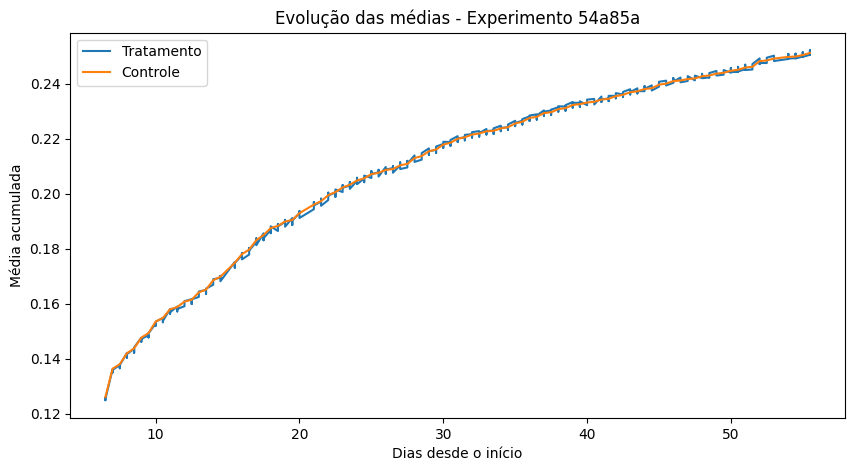

In [7]:
exp_id = '54a85a'
sub_df = df[(df["experiment_id"] == exp_id) & (df["metric_id"] == 1)]
df_ord = sub_df.sort_values("time_since_start")

plt.figure(figsize=(10,5))
# Plotar evolução da média
plt.plot(df_ord["time_since_start"], df_ord["mean_t"], label="Tratamento")
plt.plot(df_ord["time_since_start"], df_ord["mean_c"], label="Controle")
plt.xlabel("Dias desde o início")
plt.ylabel("Média acumulada")
plt.title(f"Evolução das médias - Experimento {exp_id}")
# plt.axvline (x=55.5, color='r',linestyle = '--') 
# sns.lineplot(x=[55.5], y=[0.252], marker='o', markersize=7, color='r')
plt.legend()
plt.show()

In [8]:
# new_df.loc[new_df['experiment_id'] == '54a85a'] # ultimo timestemp, mais tempo desde o incicio, mais dados

new_df.iloc[0]

experiment_id          54a85a
variant_id                  1
metric_id                   1
time_since_start         55.5
count_c             3320536.0
count_t             3316730.0
mean_c               0.251191
mean_t               0.252204
variance_c           0.188094
variance_t           0.188597
Name: 8459, dtype: object

In [9]:
row = new_df.iloc[0]

count_c = row['count_c']
count_t = row['count_t']
mean_c = row['mean_c']
mean_t = row['mean_t']
variance_c = row['variance_c']
variance_t = row['variance_t']

Para calcuar o erro padrão entre as duas médias:

$SE = \sqrt{\frac{s^2_c}{n_c}+\frac{s^2_t}{c_t}}$

In [10]:
SE = np.sqrt((variance_c/count_c)+(variance_t/count_t))
print(f'Standard Error: {SE}')

Standard Error: 0.0003369097700431301


Calculando a estatistica Z:

$Z_{score} = \frac{\bar{x}_t - \bar{x}_c}{SE}$

In [11]:
Z = (mean_t- mean_c)/SE
print(f'Z statistic: {Z}')

Z statistic: 3.006906995504404


In [12]:

p_valor = 2 * (1-norm.cdf(abs(Z)))
print(f'P-valor: {p_valor}')

P-valor: 0.0026392049550985064


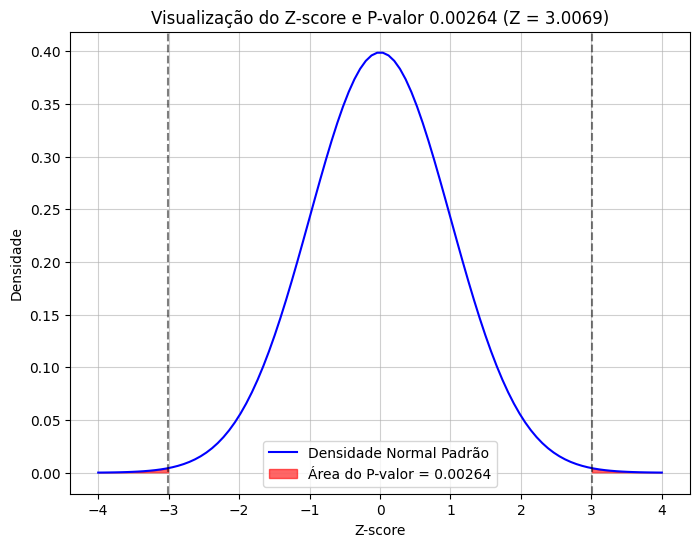

In [24]:

# Criar pontos para o eixo x (Z-scores)
x = np.linspace(-4, 4, 100)
# Calcular a densidade normal padrão
y = norm.pdf(x, 0, 1)

# Criar o gráfico
plt.figure(figsize=(8, 6))
# Plotar a curva de densidade
plt.plot(x, y, 'b-', label='Densidade Normal Padrão')

# Sombrear as caudas (Z < -3.0069 e Z > 3.0069)
x_left_tail = np.linspace(-4, -Z, 100)
x_right_tail = np.linspace(Z, 4, 100)
plt.fill_between(x_left_tail, norm.pdf(x_left_tail, 0, 1), color='red', alpha=0.6, label=f'Área do P-valor = {p_valor:.5f}')
plt.fill_between(x_right_tail, norm.pdf(x_right_tail, 0, 1), color='red', alpha=0.6)

# Configurar o gráfico
plt.title(f'Visualização do Z-score e P-valor {p_valor:.5f} (Z = {Z:.4f})')
plt.xlabel('Z-score')
plt.ylabel('Densidade')
plt.axvline(x=-Z, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=Z, color='black', linestyle='--', alpha=0.5)
plt.legend()
plt.grid(True, alpha=0.6)

# Exibir o gráfico
plt.show()

## Modularizando testes

In [16]:
def sezp_report(df, metrica: int, exp_list: list, nivel=0.95):
    metric_df = df[df['metric_id'] == metrica]
    summary_res = []

    pairs = metric_df[['experiment_id', 'variant_id']].drop_duplicates().values

    for exp_id, var_id in pairs:
        new_df = metric_df[
            (metric_df['experiment_id'] == exp_id) &
            (metric_df['variant_id'] == var_id)
        ].sort_values('time_since_start', ascending=False)

        if new_df.empty:
            continue

        row = new_df.iloc[0]

        count_c = row['count_c']
        count_t = row['count_t']
        mean_c = row['mean_c']
        mean_t = row['mean_t']
        var_c = row['variance_c']
        var_t = row['variance_t']

        effect_size = mean_t - mean_c
        effect_percent = 100 * (effect_size / mean_c) if mean_c > 0 else np.nan

        se = np.sqrt((var_c / count_c) + (var_t / count_t))
        z_score = (mean_t - mean_c) / se
        p_valor = 2 * (1 - norm.cdf(abs(z_score)))

        ic_z = norm.ppf(1 - (1 - nivel) / 2)
        ic_inf = effect_size - (ic_z * se)
        ic_sup = effect_size + (ic_z * se)

        significant = p_valor < 0.05

        # interpretação automática
        if significant:
            if effect_size > 0:
                interpretacao = "Aumento significativo na métrica."
            else:
                interpretacao = "Redução significativa na métrica."
        else:
            interpretacao = "Inconclusivo: sem diferença estatística detectada."

        summary_res.append({
            'Experiment ID': exp_id,
            'Métrica': metrica,
            'Tempo Final (dias)': row['time_since_start'],
            'Taxa Controle': round(mean_c, 4),
            'Taxa Tratamento': round(mean_t, 4),
            'Dif. Absoluta': round(effect_size, 4),
            'Dif. Relativa (%)': f"{effect_percent:.2f}%",
            'IC 95% (Inf)': round(ic_inf, 4),
            'IC 95% (Sup)': round(ic_sup, 4),
            'Z-Score': round(z_score, 4),
            'P-Valor': round(p_valor, 6),
            'Significativo': "Yes" if significant else "No",
            'interpretação': interpretacao

        })

    report_df = pd.DataFrame(summary_res)
    return report_df

In [27]:
#coletando todos os experimentos
total_exp  = list(df.loc[(df['metric_id'] == 1)]['experiment_id'].unique())

exp_list = total_exp
report_df = sezp_report(df,metrica = 1, exp_list = exp_list);

#apresentando os 20 top menores p-valores
report_df.head(20).sort_values('P-Valor',ascending=True)

,Experiment ID,Métrica,Tempo Final (dias),Taxa Controle,Taxa Tratamento,Dif. Absoluta,Dif. Relativa (%),IC 95% (Inf),IC 95% (Sup),Z-Score,P-Valor,Significativo,interpretação
9,2c8a04,1,131.0,0.0630,0.0642,0.0012,1.94%,0.0011,0.0013,28.5835,0.000000,Yes,Aumento significativo na métrica.
18,3c9dfd,1,30.5,0.1959,0.1971,0.0011,0.57%,0.0005,0.0017,3.8333,0.000126,Yes,Aumento significativo na métrica.
13,39aed1,1,22.5,0.0373,0.0371,-0.0001,-0.39%,-0.0003,-0.0000,-2.2295,0.025780,Yes,Redução significativa na métrica.
8,26bd38,1,46.5,0.1518,0.1524,0.0006,0.38%,0.0001,0.0011,2.1954,0.028135,Yes,Aumento significativo na métrica.
14,3b4300,1,39.5,0.1403,0.1415,0.0012,0.89%,-0.0001,0.0026,1.8536,0.063790,No,Inconclusivo: sem diferença estatística detect...
16,3b4300,1,39.5,0.1403,0.1414,0.0011,0.79%,-0.0002,0.0024,1.6436,0.100259,No,Inconclusivo: sem diferença estatística detect...
1,058875,1,21.5,0.0456,0.0457,0.0001,0.22%,-0.0000,0.0002,1.4601,0.144249,No,Inconclusivo: sem diferença estatística detect...
6,1bacbe,1,45.0,0.0469,0.0469,-0.0001,-0.17%,-0.0002,0.0000,-1.4169,0.156525,No,Inconclusivo: sem diferença estatística detect...
7,2203f3,1,42.5,0.3010,0.3016,0.0006,0.21%,-0.0003,0.0016,1.3651,0.172214,No,Inconclusivo: sem diferença estatística detect...
3,0bad33,1,45.5,0.2187,0.2191,0.0004,0.17%,-0.0002,0.0009,1.3607,0.173620,No,Inconclusivo: sem diferença estatística detect...


In [18]:
report_df.loc[report_df['interpretação'] =='Redução significativa na métrica.']

,Experiment ID,Métrica,Tempo Final (dias),Taxa Controle,Taxa Tratamento,Dif. Absoluta,Dif. Relativa (%),IC 95% (Inf),IC 95% (Sup),Z-Score,P-Valor,Significativo,interpretação
13,39aed1,1,22.5,0.0373,0.0371,-0.0001,-0.39%,-0.0003,-0.0000,-2.2295,0.025780,Yes,Redução significativa na métrica.
22,4509ec,1,28.5,0.0569,0.0559,-0.0009,-1.67%,-0.0011,-0.0008,-15.5230,0.000000,Yes,Redução significativa na métrica.
23,47a23b,1,43.5,0.2150,0.2139,-0.0011,-0.53%,-0.0018,-0.0005,-3.5077,0.000452,Yes,Redução significativa na métrica.
48,873d9d,1,45.5,0.0469,0.0468,-0.0001,-0.28%,-0.0002,-0.0000,-2.5197,0.011746,Yes,Redução significativa na métrica.
54,9b959e,1,15.5,0.0460,0.0452,-0.0008,-1.71%,-0.0009,-0.0006,-10.0180,0.000000,Yes,Redução significativa na métrica.
70,c3d89d,1,39.0,0.0493,0.0489,-0.0004,-0.80%,-0.0006,-0.0001,-3.1116,0.001861,Yes,Redução significativa na métrica.
79,d54896,1,38.0,0.0739,0.0736,-0.0003,-0.40%,-0.0005,-0.0000,-2.2931,0.021844,Yes,Redução significativa na métrica.
86,e4c4a1,1,36.0,0.1856,0.1841,-0.0016,-0.84%,-0.0022,-0.0009,-4.8412,0.000001,Yes,Redução significativa na métrica.
92,eeefa3,1,13.0,0.2103,0.2079,-0.0024,-1.13%,-0.0037,-0.0010,-3.4857,0.000491,Yes,Redução significativa na métrica.
96,f50b07,1,26.0,0.7724,0.7697,-0.0027,-0.35%,-0.0043,-0.0011,-3.2953,0.000983,Yes,Redução significativa na métrica.


In [19]:
report_df.loc[report_df['Experiment ID'] =='f50b07']

,Experiment ID,Métrica,Tempo Final (dias),Taxa Controle,Taxa Tratamento,Dif. Absoluta,Dif. Relativa (%),IC 95% (Inf),IC 95% (Sup),Z-Score,P-Valor,Significativo,interpretação
96,f50b07,1,26.0,0.7724,0.7697,-0.0027,-0.35%,-0.0043,-0.0011,-3.2953,0.000983,Yes,Redução significativa na métrica.


In [20]:
report_df['interpretação'].value_counts()

interpretação
Inconclusivo: sem diferença estatística detectada.    73
Aumento significativo na métrica.                     16
Redução significativa na métrica.                     10
Name: count, dtype: int64

In [21]:
def plot_forest(df, top_n=10):
    plot_df = df.copy().sort_values('P-Valor').head(top_n)
    plt.figure(figsize=(8, top_n * 0.6))

    y = range(len(plot_df))
    plt.errorbar(
        plot_df['Dif. Absoluta'], y,
        xerr=[
            plot_df['Dif. Absoluta'] - plot_df['IC 95% (Inf)'],
            plot_df['IC 95% (Sup)'] - plot_df['Dif. Absoluta']
        ],
        fmt='o', color='black', ecolor='gray', capsize=4
    )

    plt.yticks(y, plot_df['Experiment ID'])
    plt.axvline(0, color='red', linestyle='--', label='Sem efeito')
    plt.xlabel('Diferença Absoluta (Trat - Controle)')
    plt.ylabel('Experimentos')
    # Ajuste dinâmico dos xticks com base no menor IC 95% (Inf)
    min_ic_inf = plot_df['IC 95% (Inf)'].min()
    max_ic_sup = plot_df['IC 95% (Sup)'].max()

    xtick_start = np.floor(min_ic_inf * 1000) / 1000 - 0.001  # Ajuste para incluir um pequeno buffer
    xtick_end = np.ceil(max_ic_sup * 1000) / 1000 + 0.001    # Ajuste para incluir um pequeno buffer
    xticks = np.arange(xtick_start, xtick_end + 0.001, 0.001)
    plt.xticks(xticks,rotation=-45)
    plt.title('Forest Plot – Efeito e IC 95% por experimento')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

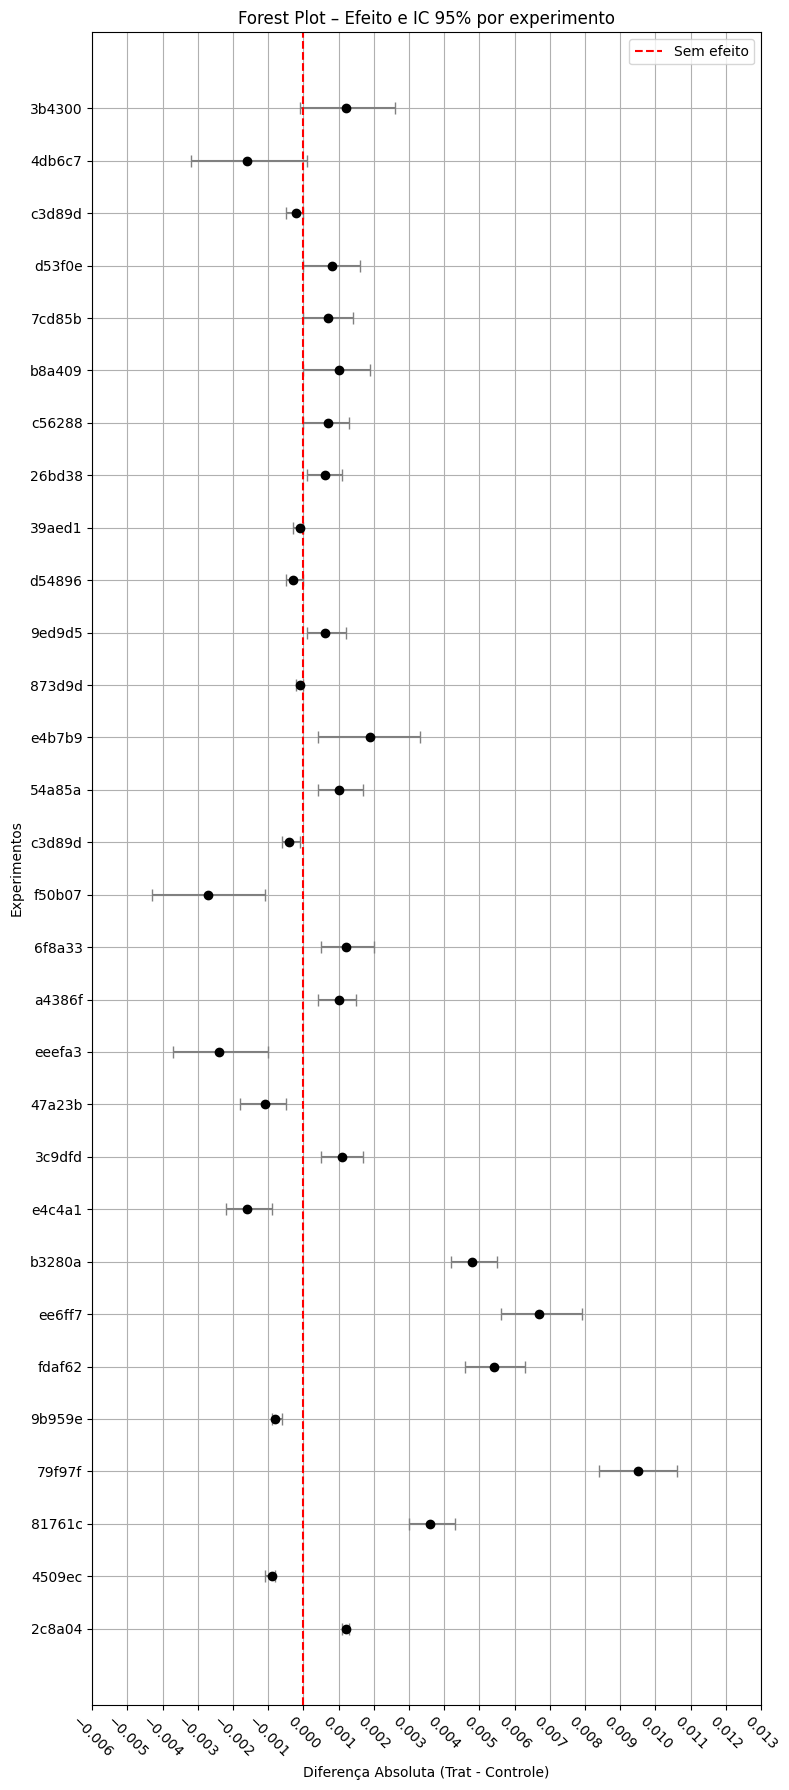

In [22]:
plot_forest(report_df,30)

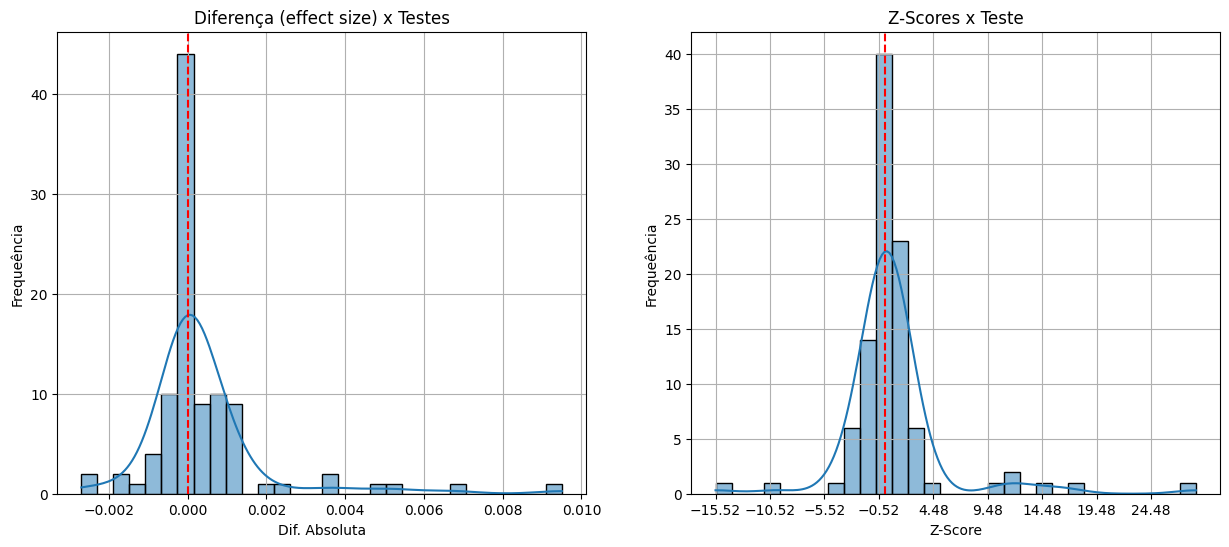

In [23]:
fig,ax = plt.subplots(1,2,figsize=(15,6))


bins = 30

plt.subplot(1,2,1)
sns.histplot(report_df['Dif. Absoluta'],bins = bins,kde= True)
plt.title('Diferença (effect size) x Testes')
plt.ylabel('Frequeência')
plt. axvline (x=0, color='r',linestyle = '--') 
plt.grid(True)

plt.subplot(1,2,2)
sns.histplot(report_df['Z-Score'],bins = bins,kde= True)
plt.title('Z-Scores x Teste')
plt.ylabel('Frequeência')
plt.xticks(np.arange(report_df['Z-Score'].min(),report_df['Z-Score'].max(), 5))
plt. axvline (x=0, color='r',linestyle = '--') 
plt.grid(True)


# plt.subplot(2,1,2)
# plt.scatter(report_df['Dif. Absoluta'],report_df['Z-Score'])
# plt.grid()

# plt.tight_layout()
# plt.show()


